In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [10]:
# Carrega os dados
data = pd.read_csv("DSL-StrongPasswordData.csv", header = 0)
# Reinicia o index
data = data.reset_index()
# Pega os IDs unicos campo 'subject'
unisub = list(data['subject'].unique())
# Cria ID numerico sequencial
mlist = [int(x) for x in range(len(unisub))]
# Vincula o Id numerico com o campo 'subject'
newvalue = dict(zip(unisub, mlist))
# Exibe dados tratados
data['subject'] = data['subject'].map(newvalue)

# Divide o conjunto de dados utilizando a proporção 80:20
train, test = train_test_split(data, test_size = 0.2)

features = list(data.columns[2:])

X = data[features].values
y = data['subject'].values

class_names = unisub

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='rbf', C=5.4555947811685145e+50, gamma=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [14]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[76  0  5 ...,  0  0  0]
 [ 0 82  3 ...,  0  1  0]
 [ 3  2 73 ...,  0  0  0]
 ..., 
 [ 2  0  0 ..., 97  0  0]
 [ 2  0  3 ...,  0 72  2]
 [ 1  0  0 ...,  0  0 57]]


Normalized confusion matrix
[[ 0.81  0.    0.05 ...,  0.    0.    0.  ]
 [ 0.    0.83  0.03 ...,  0.    0.01  0.  ]
 [ 0.03  0.02  0.83 ...,  0.    0.    0.  ]
 ..., 
 [ 0.02  0.    0.   ...,  0.92  0.    0.  ]
 [ 0.02  0.    0.03 ...,  0.    0.74  0.02]
 [ 0.01  0.    0.   ...,  0.    0.    0.67]]


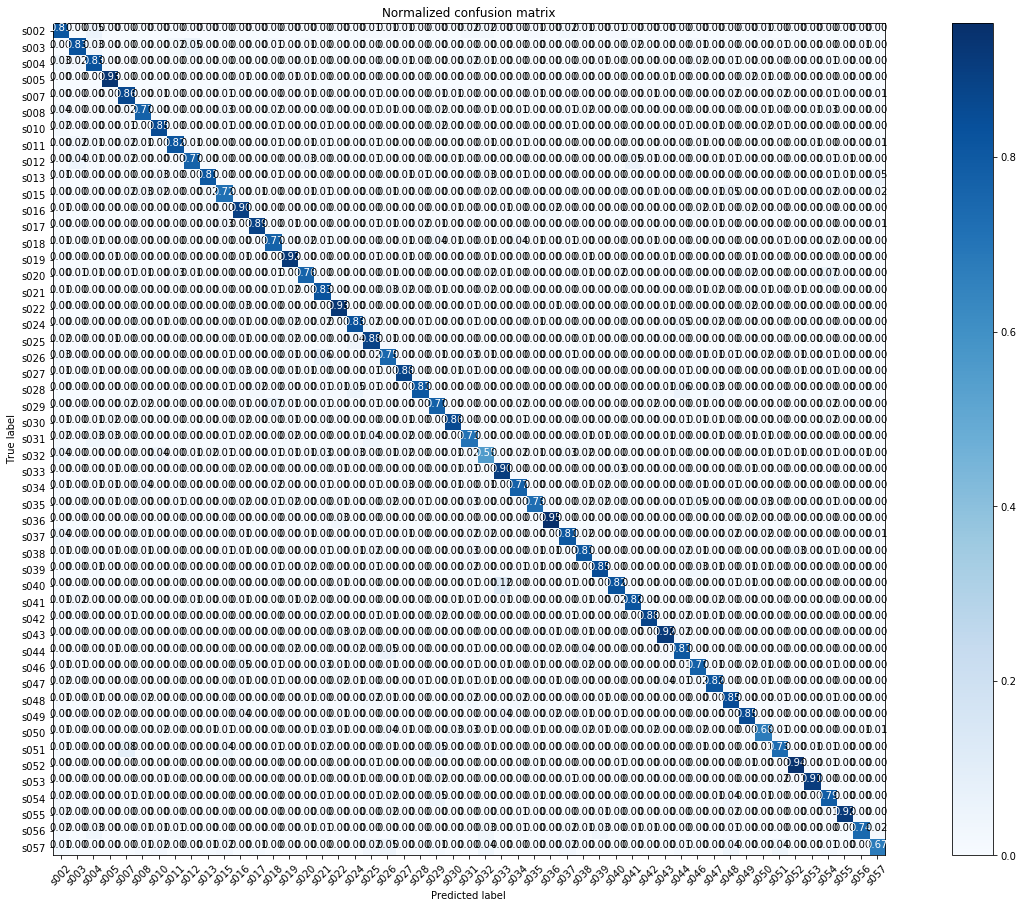

In [18]:
# Plot normalized confusion matrix
#plt.figure()
plt.figure(figsize=(6*3.13,4*3.13)) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
